### Name: Asha Cumberbatch 
### Date: April 8th
### Assignment: Project 2 part 2 - Research questions and graphs
### Purpose: The aim of this notebook is to merge the data web scraped from five Wikipedia pages, relating to various metrics of each state, such as employment rates, minimum wage, migration rates, mean household income and gdp. That data will then be analyzed to answer related research questions.

### Library imports and data analysis
#### The first step is to once again import any libraries that may be needed for data analysis, or graph creation

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

#### Next, the graphs from the five previous pages are imported, and combined into one dataframe using the column the have in common - State

In [2]:
employment_df = pd.read_csv("employment_df.csv")
net_combined_migration_df = pd.read_csv("net_combined_migration_df.csv")
minimum_wage_df = pd.read_csv("minimum_wage_df.csv")
household_income_df = pd.read_csv("household_income_df.csv")
gdp_df = pd.read_csv("gdp_df.csv")


In [3]:
states_df = employment_df.merge(net_combined_migration_df, on='State', how='inner') \
                 .merge(minimum_wage_df, on='State', how='inner') \
                 .merge(household_income_df, on='State', how='inner') \
                 .merge(gdp_df, on='State', how='inner')
# these files are merged on the column they have in common, State

#### The columns from the data frame represent the employment rate for 2022, the combined migration rate (composed of domestic and international migration), minimum wage for 2024, mean household income for 2023 and nominal gdp for 2024. To this region will be added, and a copy of the new states_df saved.

In [4]:
states_df

,State,employment rate,combined migration rate,minimum wage 2024,household income 2023,nominal gdp 2024
0,Alabama,55.5,31.44,7.25,62212,281569
1,Alaska,61.6,-11.44,11.73,88121,65699
2,Arizona,59.3,57.50,14.35,77315,475654
3,Arkansas,55.6,29.01,11.00,58700,165989
4,California,59.3,-13.42,16.00,95521,3641643
5,Colorado,66.3,19.78,14.42,92911,491289
6,Connecticut,62.8,19.67,15.69,91665,319345
7,Delaware,57.7,64.76,13.25,82174,90208
8,Florida,57.6,89.69,13.00,73311,1439065
9,Georgia,59.6,35.13,7.25,74632,767378


In [5]:
state_region_mapping = {
    'Alabama': 'South', 'Alaska': 'West', 'Arizona': 'West', 'Arkansas': 'South',
    'California': 'West', 'Colorado': 'West', 'Connecticut': 'Northeast', 'Delaware': 'South',
    'Florida': 'South', 'Georgia': 'South', 'Hawaii': 'West', 'Idaho': 'West',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Kentucky': 'South', 'Louisiana': 'South', 'Maine': 'Northeast', 'Maryland': 'South',
    'Massachusetts': 'Northeast', 'Michigan': 'Midwest', 'Minnesota': 'Midwest',
    'Mississippi': 'South', 'Missouri': 'Midwest', 'Montana': 'West',
    'Nebraska': 'Midwest', 'Nevada': 'West', 'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast', 'New Mexico': 'West', 'New York': 'Northeast',
    'North Carolina': 'South', 'North Dakota': 'Midwest', 'Ohio': 'Midwest',
    'Oklahoma': 'South', 'Oregon': 'West', 'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast', 'South Carolina': 'South', 'South Dakota': 'Midwest',
    'Tennessee': 'South', 'Texas': 'South', 'Utah': 'West', 'Vermont': 'Northeast',
    'Virginia': 'South', 'Washington': 'West', 'West Virginia': 'South',
    'Wisconsin': 'Midwest', 'Wyoming': 'West'
}


In [6]:
states_df['region'] = states_df['State'].map(state_region_mapping)


In [7]:
states_df

,State,employment rate,combined migration rate,minimum wage 2024,household income 2023,nominal gdp 2024,region
0,Alabama,55.5,31.44,7.25,62212,281569,South
1,Alaska,61.6,-11.44,11.73,88121,65699,West
2,Arizona,59.3,57.50,14.35,77315,475654,West
3,Arkansas,55.6,29.01,11.00,58700,165989,South
4,California,59.3,-13.42,16.00,95521,3641643,West
5,Colorado,66.3,19.78,14.42,92911,491289,West
6,Connecticut,62.8,19.67,15.69,91665,319345,Northeast
7,Delaware,57.7,64.76,13.25,82174,90208,South
8,Florida,57.6,89.69,13.00,73311,1439065,South
9,Georgia,59.6,35.13,7.25,74632,767378,South


In [8]:
states_df.to_csv('states_df.csv', index=False)

### Now that it has been verified that the data has been transferred into one dataframe, it is possible to perform some data analysis on the set, like pulling the shape and description of the new states dataframe

In [9]:
states_df.dtypes

State                       object
employment rate            float64
combined migration rate    float64
minimum wage 2024          float64
household income 2023        int64
nominal gdp 2024             int64
region                      object
dtype: object

In [10]:
states_df.info

<bound method DataFrame.info of              State  employment rate  combined migration rate  \
0          Alabama             55.5                    31.44   
1           Alaska             61.6                   -11.44   
2          Arizona             59.3                    57.50   
3         Arkansas             55.6                    29.01   
4       California             59.3                   -13.42   
5         Colorado             66.3                    19.78   
6      Connecticut             62.8                    19.67   
7         Delaware             57.7                    64.76   
8          Florida             57.6                    89.69   
9          Georgia             59.6                    35.13   
10          Hawaii             58.1                   -13.76   
11           Idaho             61.4                    77.42   
12        Illinois             61.5                   -10.87   
13         Indiana             61.6                    17.51   
14      

In [11]:
states_df.head()

,State,employment rate,combined migration rate,minimum wage 2024,household income 2023,nominal gdp 2024,region
0,Alabama,55.5,31.44,7.25,62212,281569,South
1,Alaska,61.6,-11.44,11.73,88121,65699,West
2,Arizona,59.3,57.50,14.35,77315,475654,West
3,Arkansas,55.6,29.01,11.00,58700,165989,South
4,California,59.3,-13.42,16.00,95521,3641643,West


In [12]:
states_df.tail()

,State,employment rate,combined migration rate,minimum wage 2024,household income 2023,nominal gdp 2024,region
45,Virginia,63.0,14.40,12.00,89931,663106,South
46,Washington,61.4,24.02,16.28,94605,738101,West
47,West Virginia,52.5,9.98,8.75,55948,97417,South
48,Wisconsin,63.1,11.27,7.25,74631,396209,Midwest
49,Wyoming,61.4,17.91,7.25,72415,49081,West


In [13]:
states_df.sample()

,State,employment rate,combined migration rate,minimum wage 2024,household income 2023,nominal gdp 2024,region
27,Nevada,57.9,49.23,12.0,76364,222939,West


In [14]:
states_df.shape

(50, 7)

In [15]:
states_df.count()

State                      50
employment rate            50
combined migration rate    50
minimum wage 2024          50
household income 2023      50
nominal gdp 2024           50
region                     50
dtype: int64

In [16]:
states_df.describe()

,employment rate,combined migration rate,minimum wage 2024,household income 2023,nominal gdp 2024
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,60.554000,22.948400,10.751000,77022.540000,5.086512e+05
std,3.862388,24.802323,3.258876,12294.338513,6.559368e+05
min,52.500000,-22.120000,7.250000,54203.000000,4.083100e+04
25%,57.900000,9.980000,7.250000,69256.500000,1.145385e+05
50%,61.350000,17.065000,10.925000,74631.500000,2.946305e+05
75%,62.800000,34.810000,14.000000,85057.500000,6.529702e+05
max,68.100000,89.690000,16.280000,99858.000000,3.641643e+06


In [17]:
states_df['nominal gdp 2024']

0      281569
1       65699
2      475654
3      165989
4     3641643
5      491289
6      319345
7       90208
8     1439065
9      767378
10     101083
11     110871
12    1025667
13     470324
14     238342
15     209326
16     258981
17     291952
18      85801
19     480113
20     691461
21     622563
22     448032
23     139976
24     396890
25      67072
26     164934
27     222939
28     105025
29     754948
30     125541
31    2048403
32     715968
33      72651
34     825990
35     242739
36     297309
37     911813
38      72771
39     297546
40      68782
41     485657
42    2402137
43     256370
44      40831
45     663106
46     738101
47      97417
48     396209
49      49081
Name: nominal gdp 2024, dtype: int64

In [18]:
states_df['combined migration rate']

0     31.44
1    -11.44
2     57.50
3     29.01
4    -13.42
5     19.78
6     19.67
7     64.76
8     89.69
9     35.13
10   -13.76
11    77.42
12   -10.87
13    17.51
14    12.63
15     6.20
16    22.06
17   -15.11
18    46.17
19     5.46
20    13.13
21     9.59
22     5.81
23    -0.74
24    16.43
25    51.76
26     9.98
27    49.23
28    29.12
29    14.53
30    10.46
31   -22.12
32    54.90
33     8.62
34    10.70
35    33.85
36    12.09
37    11.53
38    16.62
39    73.39
40    31.62
41    47.06
42    53.81
43    39.67
44    18.97
45    14.40
46    24.02
47     9.98
48    11.27
49    17.91
Name: combined migration rate, dtype: float64

In [19]:
states_df.columns

Index(['State', 'employment rate', 'combined migration rate',
       'minimum wage 2024', 'household income 2023', 'nominal gdp 2024',
       'region'],
      dtype='object')

### Research Questions
#### After taking a look at the data, and getting familiar with the set, there are some questions that stand out.

### Question 1
#### Do states that have a higher minimum wage have a higher migration rate than states with a lower minimum wage?
#### It is possible that a higher minimum wage will draw more individuals to move to a state.

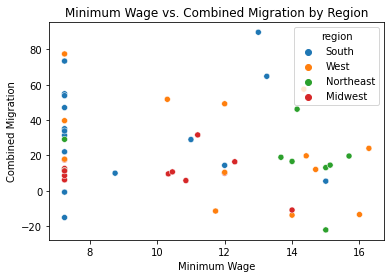

In [20]:
sns.scatterplot(x='minimum wage 2024',
                y='combined migration rate',
                hue = 'region',
                data=states_df)

plt.title('Minimum Wage vs. Combined Migration by Region')
plt.xlabel('Minimum Wage')
plt.ylabel('Combined Migration')

plt.show()

#### Higher minimum wages are not consistently shown to result in a higher immigration level. If this were the case, the immigration level would be higher for more states with a minimum wage on the higher end of the scale, (closer to 16 dollars). Instead, several states with a minimum wage below 8 dollars have a higher immigration rate than even those at 16 dollars

### Question 2 
#### Do some regions experience a higher migration rate than others
#### Question 1 shows that migration does not seem to be based primarily on minimum wage, but by analyzing the relationship between region and migration, a pattern of migration it may be revealed.

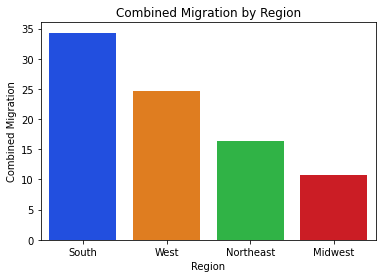

In [21]:
sns.barplot(data=states_df, x='region', y='combined migration rate', palette='bright', ci = None)

plt.title('Combined Migration by Region')
plt.xlabel('Region')
plt.ylabel('Combined Migration')

plt.show()

#### The second graph shows that while all regions experience an influx of immigrants, Southern states have higher migration rates than any other region in the country, while states in the Midwest trail behind.

### Question 3
#### Do some regions have a higher minimum wage than others?
#### The data has shown higher immigration levels in the south, but indicates that this is not necessarily due to a higher minimum wage. It therefore needs to be investigated if each region has a significantly different minimum wage. 

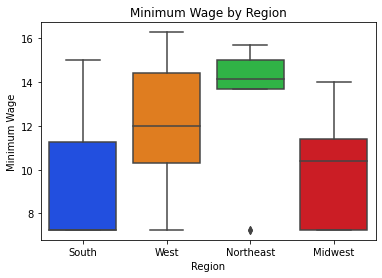

In [22]:
sns.boxplot(data=states_df, x='region', y='minimum wage 2024', palette='bright')

plt.title('Minimum Wage by Region')
plt.xlabel('Region')
plt.ylabel('Minimum Wage')

plt.show()

#### Graph three shows that, with the exception of one outlier, the Northeast is the region with the higest minimum wages. There is the most variation in the West, providing the values for the highest and lowest entries. Most states in the Midwest have a minimum wage around 10 dollars, with a few spanning up to around 14 dollars. 
#### The states in the South on the other hand sit primarily in the range of 7.25 to 11, with only a few states offering around 15 dollars.

### Question 4
#### Do some regions have a higher mean household income than others?
#### Knowing how the minimum wage varies by region, it is valuable to see if this also has an impact on each region's mean household income. 

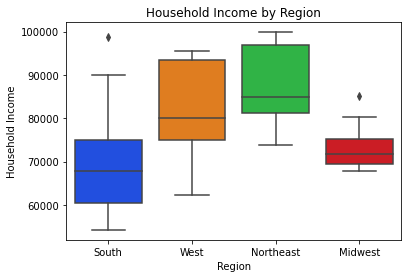

In [23]:
sns.boxplot(data=states_df, x='region', y='household income 2023', palette='bright')

plt.title('Household Income by Region')
plt.xlabel('Region')
plt.ylabel('Household Income')

plt.show()

#### As expected the mean household income of each region slightly resembles the patern for each region's minimum wage. States in the Northeast generally have the highest mean income. States in the West and Midwest have a lower mean income than those in the Northeast, but higher than those in the South. 

### Summary 
#### while immigration rates are higher in the Southern states, this is not primarily due to higher minimum wages, whic are most often seen by states in the Northeast. Those higher minimum wages do however, have the effect of higher mean household incomes for those states in the Northeast.

### References 

#### Wikipedia contributors. (n.d.). List of U.S. states and territories by GDP. Wikipedia, The Free Encyclopedia. Retrieved April 8, 2025, from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_GDP
#### Wikipedia contributors. (n.d.). List of US states by minimum wage. Wikipedia, The Free Encyclopedia. Retrieved April 8, 2025, from https://en.wikipedia.org/wiki/List_of_US_states_by_minimum_wage
#### Wikipedia contributors. (n.d.). List of U.S. states and territories by income. Wikipedia, The Free Encyclopedia. Retrieved April 8, 2025, from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income#States_and_territories_ranked_by_median_household_income
#### Wikipedia contributors. (n.d.). List of U.S. states and territories by net migration. Wikipedia, The Free Encyclopedia. Retrieved April 8, 2025, from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_net_migration
#### Wikipedia contributors. (n.d.). List of U.S. states by employment rate. Wikipedia, The Free Encyclopedia. Retrieved April 8, 2025, from https://en.wikipedia.org/wiki/List_of_U.S._states_by_employment_rate
